In [2]:
import pandas as pd

# 데이터 경로
data_path ='/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

- 데이터를 읽어올 때 index_col파라미터에 'id'를 전달했다.
- index_col은 불러올 DataFrame의 인덱스를 지정하는 파라미터이다. 열 이름을 전달하면 해당 열을 인덱스로 지정한다.
- 이번 대회에서는 index_col을 명시하지 않고 데이터를 불러오면 id라는 열이 보인다.
- 이 열은 타깃 값을 예측하는 데 어떠한 정보도 제공하지 않고 단지 각 행을 구분하는 역할만 한다. 그래서 id를 인덱스로 지정한것이다.


In [3]:
train.shape, test.shape

((300000, 24), (200000, 23))

- 훈련 데이터는 300,000행 24열, 테스트 데이터는 200,000행 23열로 구성돼 있다.


In [4]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [5]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


#### 피처 요약표 만들기
- 이제 모든 피처르 면밀히 살펴봅시다. 피처타입이 무엇인지, 결측값은 없는지, 고유한 값은 몇 개 인지, 실제 어떤 값이 입력돼 있는지 알아보자
- 이를 위해 피처 요약표를 만들엤다. 피처 요약표는 피처별 데이터 타입, 결측값 개수, 고윳값 개수, 실제 입력값 등을 정리한 표이다.

In [10]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데티어 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터셋 형상 : (300000, 24)


,피처,데티어 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


#### 피처 요약표 해석하기
- 앞에서 생성한 피처 요약표를 해석해보겠다.
    - 이진(binary)피처 : bin_0~bin_4
        - 이 피처들은 고윳값이 모두 2개이다. 이진 피처라 그렇다. 이중 bin_0, bin_1, bin_2는 데이터 타입이 int64고, 실젯값이 0또는 1로 구성돼 있다.
        - bin_3, bin_4는 object 타입이고, 실젯값은 T 또는 F(bin_3 피처), Y 또는 N(bin_4 피처)이다. T는 True, F는 False, Y는 Yes, N은 No를 의미한다고 보면 된다.
        - 그러므로 모델링할 때 T와 Y는 1로, F와 N은 0으로 인코딩하겠다.
        - 머신러닝 모델은 숫자만 인식하기 때문에 결측값 개수 열에 나와 있듯이 이진 피처에 결측값은 하나도 없다.
    - 명목형(nominal)피처: nom_0~mom_9
        - 모두 object 타입이다. 결측값은 없다.
        - nom_0부터 nom_4는 고윳값이 6개 이하인데, nom_5부터 nom_9는 고윳값이 많다.
        - 또한 mon_5부터 nom_9 피처에는 의미를 알 수 없는 값이 입력돼 있다.
    - 순서형(ordinal)피처 : ord_0~ord_5
        - ord_0 피처만 int64 타입이고 나머지 object 타입이다.
        - 결측값은 역시나 없다. 명목형 데이터와 다르게 순서형 데이터는 순서가 중요하다.
        - 순서에 따라 타깃값에 미치는 영향이 다르기 때문이다. 그래서 순서에 유의하며 인코딩해야한다.
        - 순서를 파악하기 위해 순서형 피처의 고윳값을 출력해보겠다. 고윳값 갯가 적은 ord_0, ord_1, ord_2피처부터 보자
        - 다음과 같이 unique() 함수로 고윳값을 구할 수 있다.
    - 그 외 피처 : day, month, target
  
  


In [11]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


- unique() 함수는 고윳값이 등장한 순으로 출력해주니 감안해야한다.
- ord_0 피처의 고윳값은 모두 숫자이다. 숫자 크기에 순서를 맞추면 된다.
- ord_1 피처의 고윳값은 캐글 등급이다. 등급에 따라 Novice, Contributor, Expert, Master, Grandmaster 순으로 맞추겠다.
- 이렇게 정리해놔야 인코딩 할 때 순서에 맞게 매핑한다.

In [13]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값  {train[feature].unique()}')

ord_3 고윳값  ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값  ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값  ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

- 마지막으로 일, 월, 타깃값 요약표를 보겠다.
- day, month, target 피처 모두 int54 타입이고 결측값은 없다.

In [14]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


- day 피처의 고윳값이 7개이다. 요일을 나탄내다고 짐작해볼 수 있다.
- month 피처의 고윳값은 1부터 12이다. 월을 나타낸다.
- 마지막으로 타깃값은 0또는 1로 구성돼 있다.
- 지금까지 피처 요약표를 활용해 각 피처별 타입, 결측값 유무, 고윳값 개수, 실제 입력값을 알아봤다.

## 데이터 시각화

- 피처들을 시각화하여 타깃값별 피처 분포를 알아보겠다. 그래야 어떤 피처가 중요하고 어떤 고윳값이 타깃값에 영향을 많이 주는지 알게 된다.
- 타깃값, 이진 피처, 명목형 피처, 순서형 피처 순서로 그래프를 그려보겠다. 먼저 시각화 라이브러리를 불러온다.

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 타깃값 분포
- 첫 번째로 타깃값 분포를 알아보겠다. 타깃값 분포를 알면 데이터가 얼마나 불균형한지 파악하기 쉽다.
- 그래야 부족한 타깃값에 더 집중해 모델링을 수행할 수 있다. 
- 이를 위해 분포도 중 하나인 카운트 플롯으로 타깃값 0과 1의 개수를 파악하겠다.
- 카운트플롯은 범주형 데이터의 개수를 확인할 때 주로 사용한다.

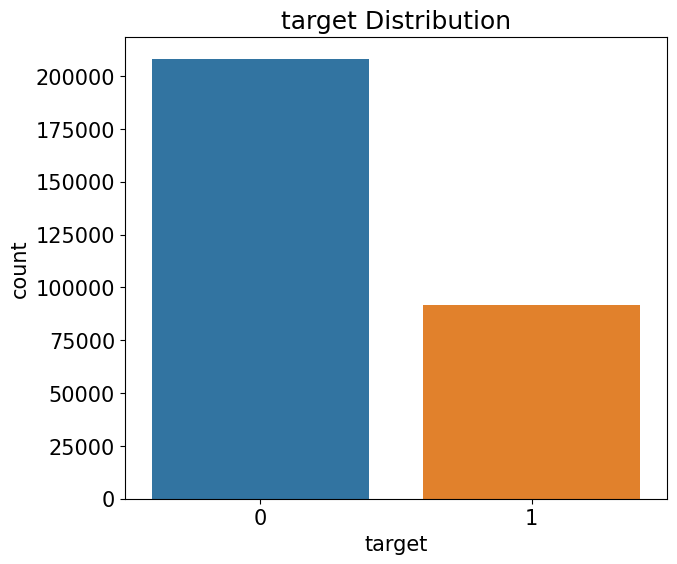

In [19]:
mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7,6))

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set_title('target Distribution');